# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.152497e+01     7.539663e+00
 * time: 0.002981901168823242
     1     2.795988e+01     4.112397e+00
 * time: 0.013364076614379883
     2     1.942731e+01     4.191568e+00
 * time: 0.026194095611572266
     3     1.279949e+01     3.126565e+00
 * time: 0.0389249324798584
     4     1.073865e+01     1.194119e+00
 * time: 0.051702022552490234
     5     9.687471e+00     1.664194e+00
 * time: 0.06195807456970215
     6     9.188080e+00     9.167599e-01
 * time: 0.07218503952026367
     7     8.861960e+00     8.506737e-01
 * time: 0.08243989944458008
     8     8.542348e+00     8.272180e-01
 * time: 0.09273004531860352
     9     8.344622e+00     7.393702e-01
 * time: 0.10312700271606445
    10     8.220582e+00     5.146174e-01
 * time: 0.11374711990356445
    11     8.113566e+00     5.977498e-01
 * time: 0.12470698356628418
    12     8.086492e+00     6.749414e-01
 * time: 0.13288593292236328
    13     8.044433e+00     5.783475e-01
 * ti

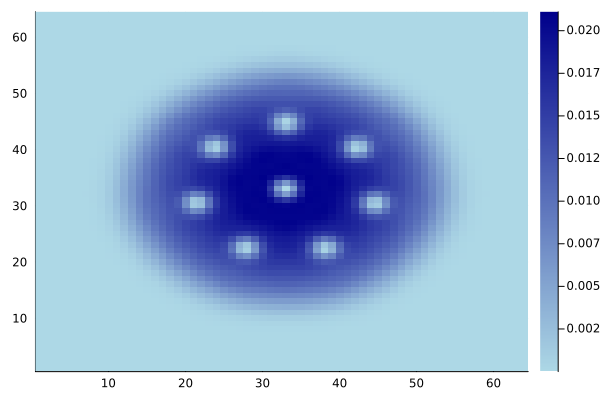

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)